# ▌Decision-Tree - Stock
## **--------------------------------**

### 1. Import libraries『匯入函式庫』

In [1]:
import os
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = '正3負2.csv'
df = pd.read_csv(data)
df['判斷'] = df['代碼']
df.to_csv('正3負2.csv', index=False, encoding='utf-8-sig')
df

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,ROE_5Y.1,EPS_5Y.1,毛利率_5Y.1,現金殖利率.1,符合數量,正負樣本,判斷
0,1101,台泥,11.00,3.69,26.64,5.87,1,1,1,1,4,1,1101
1,1102,亞泥,9.81,4.05,24.67,6.29,0,1,1,1,3,1,1102
2,1103,嘉泥,5.24,1.65,6.44,5.10,0,1,0,1,2,-1,1103
3,1104,環泥,6.66,1.82,14.24,4.79,0,1,0,0,1,-1,1104
4,1108,幸福,1.71,0.21,8.77,5.47,0,1,0,1,2,-1,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,9944,新麗,4.24,1.08,22.99,2.93,0,1,1,0,2,-1,9944
894,9945,潤泰新,17.81,7.47,22.38,2.65,1,1,1,0,3,1,9945
895,9946,三發地產,9.56,1.85,33.03,3.83,0,1,1,0,2,-1,9946
896,9955,佳龍,-6.44,-1.10,0.55,3.75,0,0,0,0,0,-1,9955


In [5]:
data = '正3負2.csv'
df = pd.read_csv(data, index_col='判斷')
df = df.drop_duplicates(keep='first')
df.to_csv('正3負2.csv', index=False, encoding='utf-8-sig')
df

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,ROE_5Y.1,EPS_5Y.1,毛利率_5Y.1,現金殖利率.1,符合數量,正負樣本
判斷,,,,,,,,,,,,
1101,1101,台泥,11.00,3.69,26.64,5.87,1,1,1,1,4,1
1102,1102,亞泥,9.81,4.05,24.67,6.29,0,1,1,1,3,1
1103,1103,嘉泥,5.24,1.65,6.44,5.10,0,1,0,1,2,-1
1104,1104,環泥,6.66,1.82,14.24,4.79,0,1,0,0,1,-1
1108,1108,幸福,1.71,0.21,8.77,5.47,0,1,0,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9944,新麗,4.24,1.08,22.99,2.93,0,1,1,0,2,-1
9945,9945,潤泰新,17.81,7.47,22.38,2.65,1,1,1,0,3,1
9946,9946,三發地產,9.56,1.85,33.03,3.83,0,1,1,0,2,-1


## **––––––––––––––––––––––––––––––––**

### 2. Exploratory data analysis 『數據分析』

In [6]:
df.shape

(898, 12)

**◎ View top 5 rows of dataset**

In [7]:
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,ROE_5Y.1,EPS_5Y.1,毛利率_5Y.1,現金殖利率.1,符合數量,正負樣本
判斷,,,,,,,,,,,,
1101,1101,台泥,11.00,3.69,26.64,5.87,1,1,1,1,4,1
1102,1102,亞泥,9.81,4.05,24.67,6.29,0,1,1,1,3,1
1103,1103,嘉泥,5.24,1.65,6.44,5.10,0,1,0,1,2,-1
1104,1104,環泥,6.66,1.82,14.24,4.79,0,1,0,0,1,-1
1108,1108,幸福,1.71,0.21,8.77,5.47,0,1,0,1,2,-1


**◎ View summary of dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 1101 to 9958
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   代碼        898 non-null    int64  
 1   股票        898 non-null    object 
 2   ROE_5Y    898 non-null    float64
 3   EPS_5Y    898 non-null    float64
 4   毛利率_5Y    898 non-null    float64
 5   現金殖利率     898 non-null    float64
 6   ROE_5Y.1  898 non-null    int64  
 7   EPS_5Y.1  898 non-null    int64  
 8   毛利率_5Y.1  898 non-null    int64  
 9   現金殖利率.1   898 non-null    int64  
 10  符合數量      898 non-null    int64  
 11  正負樣本      898 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 91.2+ KB


In [9]:
df['正負樣本'].value_counts()

-1    559
 1    339
Name: 正負樣本, dtype: int64

**◎ Missing values in variables**

In [10]:
df.isnull().sum()

代碼          0
股票          0
ROE_5Y      0
EPS_5Y      0
毛利率_5Y      0
現金殖利率       0
ROE_5Y.1    0
EPS_5Y.1    0
毛利率_5Y.1    0
現金殖利率.1     0
符合數量        0
正負樣本        0
dtype: int64

In [11]:
df.isnull().any()

代碼          False
股票          False
ROE_5Y      False
EPS_5Y      False
毛利率_5Y      False
現金殖利率       False
ROE_5Y.1    False
EPS_5Y.1    False
毛利率_5Y.1    False
現金殖利率.1     False
符合數量        False
正負樣本        False
dtype: bool

## **––––––––––––––––––––––––––––––––**

# 3. Feature vector & Target variable 『特徵』

In [12]:
X = df.drop(['代碼', '股票', 'ROE_5Y.1', 'EPS_5Y.1', '毛利率_5Y.1', '現金殖利率.1', '符合數量', '正負樣本'], axis=1) 

y = df['正負樣本']

In [13]:
X = df.drop(['代碼', '股票',  'ROE_5Y.1', 'EPS_5Y.1', '毛利率_5Y.1', '現金殖利率.1', '符合數量', '正負樣本'], axis=1) 
X

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率
判斷,,,,
1101,11.00,3.69,26.64,5.87
1102,9.81,4.05,24.67,6.29
1103,5.24,1.65,6.44,5.10
1104,6.66,1.82,14.24,4.79
1108,1.71,0.21,8.77,5.47
...,...,...,...,...
9944,4.24,1.08,22.99,2.93
9945,17.81,7.47,22.38,2.65
9946,9.56,1.85,33.03,3.83


In [14]:
y = df.drop(['代碼', '股票', "現金殖利率", 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', 'ROE_5Y.1', 'EPS_5Y.1', '毛利率_5Y.1', '現金殖利率.1', '符合數量'], axis=1) 
y

,正負樣本
判斷,
1101,1
1102,1
1103,-1
1104,-1
1108,-1
...,...
9944,-1
9945,1
9946,-1


# 4. Split data into training and test set 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
X_train.shape, X_test.shape

((601, 4), (297, 4))

In [17]:
X_train.dtypes

ROE_5Y    float64
EPS_5Y    float64
毛利率_5Y    float64
現金殖利率     float64
dtype: object

In [22]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率
判斷,,,,
3703,5.06,1.51,12.96,3.09
3645,11.14,2.29,32.73,3.29
1449,-7.07,-0.34,7.13,0.00
4540,9.10,2.45,25.19,3.22
2496,12.49,5.46,47.50,8.46


In [23]:
# import category_encoders as ce

In [24]:
# encoder = ce.OrdinalEncoder(cols=['ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.transform(X_test)

In [25]:
# X_train.head()

In [26]:
# X_test.head()

## **––––––––––––––––––––––––––––––––**

# 5. Decision Tree Classifier - gini index 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**◎ Predict the Test set results with criterion gini index**

In [29]:
y_pred_gini = clf_gini.predict(X_test)

**◎ Check accuracy score with criterion gini index**

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9798


**◎ Compare the train-set and test-set accuracy**<br>
**◎ Now, I will compare the train-set and test-set accuracy to check for overfitting**.

In [31]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([-1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
        1, -1,  1,  1, -1

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9884


**◎ Check for overfitting and underfitting**

In [33]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9884
Test set score: 0.9798


# 6. Visualize decision-trees

[Text(0.5, 0.875, 'ROE_5Y <= 10.035\ngini = 0.469\nsamples = 601\nvalue = [375, 226]'),
 Text(0.2, 0.625, '現金殖利率 <= 5.045\ngini = 0.111\nsamples = 355\nvalue = [334, 21]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 290\nvalue = [290, 0]'),
 Text(0.3, 0.375, '毛利率_5Y <= 20.335\ngini = 0.437\nsamples = 65\nvalue = [44, 21]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.4, 0.125, 'gini = 0.375\nsamples = 28\nvalue = [7, 21]'),
 Text(0.8, 0.625, '毛利率_5Y <= 19.98\ngini = 0.278\nsamples = 246\nvalue = [41, 205]'),
 Text(0.7, 0.375, '現金殖利率 <= 4.905\ngini = 0.499\nsamples = 85\nvalue = [41, 44]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 44\nvalue = [0, 44]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 161\nvalue = [0, 161]')]

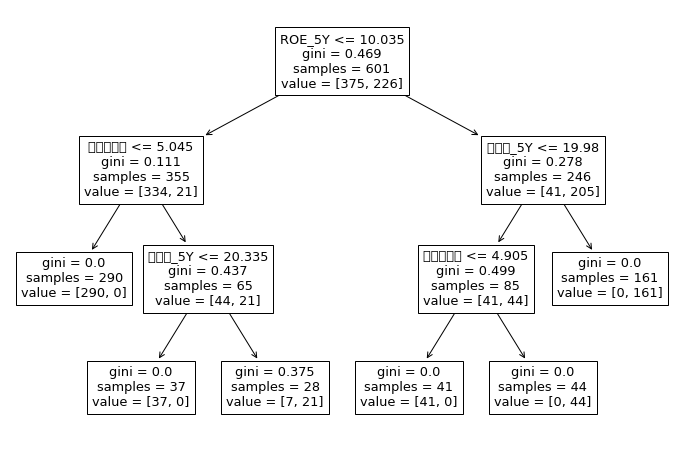

In [34]:
plt.figure(figsize=(12,8))

from sklearn import tree

# tree.plot_tree(clf_gini.fit(X_train, y_train))
tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names=X_train.columns)

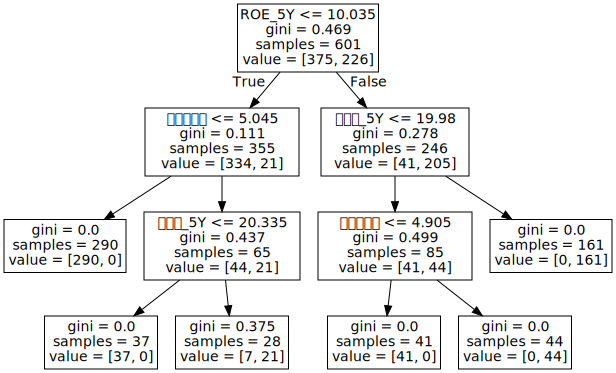

In [58]:
import graphviz 

Data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_train.columns)   
Output = graphviz.Source(Data.replace('helvetica', "Microsoft YaHei"), encoding='utf-8')
Output.format = 'png'
Output.render("正3負2") 
Output

In [36]:
(X_train, y_train)

(      ROE_5Y  EPS_5Y  毛利率_5Y  現金殖利率
 判斷                                 
 3703    5.06    1.51   12.96   3.09
 3645   11.14    2.29   32.73   3.29
 1449   -7.07   -0.34    7.13   0.00
 4540    9.10    2.45   25.19   3.22
 2496   12.49    5.46   47.50   8.46
 ...      ...     ...     ...    ...
 1519    7.77    1.00   14.05   1.99
 2340    8.63    1.58   30.33   5.08
 9802   13.25    6.00   19.30   1.40
 2702   18.21    3.22   77.36   1.29
 1514    8.45    1.24   16.51   2.15
 
 [601 rows x 4 columns],
       正負樣本
 判斷        
 3703    -1
 3645     1
 1449    -1
 4540    -1
 2496     1
 ...    ...
 1519    -1
 2340     1
 9802    -1
 2702     1
 1514    -1
 
 [601 rows x 1 columns])

In [37]:
df = X_train.merge(y_train, on='判斷')
df

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本
判斷,,,,,
3703,5.06,1.51,12.96,3.09,-1
3645,11.14,2.29,32.73,3.29,1
1449,-7.07,-0.34,7.13,0.00,-1
4540,9.10,2.45,25.19,3.22,-1
2496,12.49,5.46,47.50,8.46,1
...,...,...,...,...,...
1519,7.77,1.00,14.05,1.99,-1
2340,8.63,1.58,30.33,5.08,1
9802,13.25,6.00,19.30,1.40,-1


In [38]:
# A類：第一種可能

# 355 rows × 4 columns
ROE_5Y = df[(df['ROE_5Y'] <= 10.035)]
ROE_5Y

# 290 rows × 4 columns
Dividend_Yield = ROE_5Y[(ROE_5Y['現金殖利率'] <= 5.045)]
Dividend_Yield

Dividend_Yield['代碼'] = Dividend_Yield.index
Dividend_Yield.to_csv('Class_A.csv', encoding='utf-8-sig')

A = Dividend_Yield
A

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本,代碼
判斷,,,,,,
3703,5.06,1.51,12.96,3.09,-1,3703
1449,-7.07,-0.34,7.13,0.00,-1,1449
4540,9.10,2.45,25.19,3.22,-1,4540
1617,8.87,1.08,13.25,4.33,-1,1617
2038,0.71,0.20,2.22,3.16,-1,2038
...,...,...,...,...,...,...
2029,5.22,1.49,9.82,4.05,-1,2029
3002,2.31,0.33,26.51,2.63,-1,3002
1446,-1.13,-0.13,19.03,0.82,-1,1446


In [39]:
# B類：第二種可能

# 355 rows × 4 columns
ROE_5Y = df[(df['ROE_5Y'] <= 10.035)]
ROE_5Y

# 65 rows × 4 columns
Dividend_Yield = ROE_5Y[(ROE_5Y['現金殖利率'] >= 5.045)]
Dividend_Yield

# 37 rows × 4 columns
Gross_Margin = Dividend_Yield[(Dividend_Yield['毛利率_5Y'] <= 20.335)]
Gross_Margin
len(Gross_Margin)

Gross_Margin['代碼'] = Gross_Margin.index
Gross_Margin.to_csv('Class_B.csv', encoding='utf-8-sig')

B = Gross_Margin
B

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本,代碼
判斷,,,,,,
3550,4.70,1.06,18.67,5.07,-1,3550
1451,1.03,0.34,6.65,5.18,-1,1451
1776,6.40,0.88,17.10,6.23,-1,1776
6152,-8.40,-0.89,13.15,14.95,-1,6152
2498,-12.40,-5.66,16.53,26.23,-1,2498
2316,4.89,1.79,6.69,6.19,-1,2316
3266,1.55,0.33,18.23,6.05,-1,3266
2204,5.69,3.39,16.53,7.46,-1,2204
1710,4.84,0.77,8.14,5.21,-1,1710


In [40]:
# C類：第三種可能

# 355 rows × 4 columns
ROE_5Y = df[(df['ROE_5Y'] <= 10.035)]
ROE_5Y

# 65 rows × 4 columns
Dividend_Yield = ROE_5Y[(ROE_5Y['現金殖利率'] >= 5.045)]
Dividend_Yield

# 37 rows × 4 columns
Gross_Margin = Dividend_Yield[(Dividend_Yield['毛利率_5Y'] >= 20.335)]
Gross_Margin
len(Gross_Margin)

Gross_Margin['代碼'] = Gross_Margin.index
Gross_Margin.to_csv('Class_C.csv', encoding='utf-8-sig')

C = Gross_Margin
C

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本,代碼
判斷,,,,,,
1806,-1.45,-0.23,23.22,7.62,-1,1806
4916,3.93,1.53,20.80,5.45,1,4916
1463,9.71,1.33,28.09,8.09,1,1463
3041,-9.71,-1.52,30.64,8.20,-1,3041
1532,8.01,2.47,25.18,5.63,1,1532
2527,7.30,2.45,37.70,7.56,1,2527
1338,6.78,5.62,24.05,6.63,1,1338
1432,-16.24,-1.41,73.41,6.30,-1,1432
4942,8.64,4.39,22.10,6.31,1,4942


In [41]:
# D類：第四種可能

# 246 rows × 4 columns
ROE_5Y = df[(df['ROE_5Y'] >= 10.035)]
ROE_5Y

# 85 rows × 4 columns
Gross_Margin = ROE_5Y[(ROE_5Y['毛利率_5Y'] <= 19.98)]
Gross_Margin

# 41 rows × 4 columns
Dividend_Yield = Gross_Margin[(Gross_Margin['現金殖利率'] <= 4.905)]
Dividend_Yield
# len(Dividend_Yield)

Dividend_Yield['代碼'] = Dividend_Yield.index
Dividend_Yield.to_csv('Class_D.csv', encoding='utf-8-sig')

D = Dividend_Yield
D

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本,代碼
判斷,,,,,,
5706,11.23,2.00,19.60,2.00,-1,5706
6278,14.39,6.50,11.19,3.22,-1,6278
2247,10.21,12.79,11.81,4.59,-1,2247
9937,15.09,2.44,11.49,4.20,-1,9937
2301,11.79,3.78,15.46,3.67,-1,2301
9930,15.71,3.19,15.57,4.03,-1,9930
2351,11.94,3.56,17.99,2.02,-1,2351
6416,15.27,4.72,19.95,3.21,-1,6416
2352,13.25,2.66,13.25,4.79,-1,2352


In [42]:
# E類：第五種可能

# 246 rows × 4 columns
ROE_5Y = df[(df['ROE_5Y'] >= 10.035)]
ROE_5Y

# 85 rows × 4 columns
Gross_Margin = ROE_5Y[(ROE_5Y['毛利率_5Y'] <= 19.98)]
Gross_Margin

# 44 rows × 4 columns
Dividend_Yield = Gross_Margin[(Gross_Margin['現金殖利率'] >= 4.905)]
Dividend_Yield
len(Dividend_Yield)

Dividend_Yield['代碼'] = Dividend_Yield.index
Dividend_Yield.to_csv('Class_E.csv', encoding='utf-8-sig')

E = Dividend_Yield
E

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本,代碼
判斷,,,,,,
3048,15.45,2.43,3.05,5.68,1,3048
8131,12.35,3.18,18.72,6.27,1,8131
2546,17.79,4.66,7.57,5.67,1,2546
8112,21.82,4.49,2.85,8.58,1,8112
2597,16.21,5.98,14.19,6.09,1,2597
4722,11.73,2.95,17.60,5.11,1,4722
6281,19.94,5.00,18.97,5.35,1,6281
8271,14.07,3.80,15.60,6.35,1,8271
3231,12.27,2.50,4.84,6.69,1,3231


In [43]:
# F類：第四種可能

# 246 rows × 4 columns
ROE_5Y = df[(df['ROE_5Y'] >= 10.035)]
ROE_5Y

# 161 rows × 4 columns
Gross_Margin = ROE_5Y[(ROE_5Y['毛利率_5Y'] >= 19.98)]
Gross_Margin

Gross_Margin['代碼'] = Gross_Margin.index
Gross_Margin.to_csv('Class_F.csv', encoding='utf-8-sig')

F = Gross_Margin
F

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本,代碼
判斷,,,,,,
3645,11.14,2.29,32.73,3.29,1,3645
2496,12.49,5.46,47.50,8.46,1,2496
2114,21.09,7.26,38.13,4.86,1,2114
4755,13.06,4.65,20.74,2.23,1,4755
1590,20.70,21.36,49.00,1.02,1,1590
...,...,...,...,...,...,...
2603,31.68,10.54,20.59,5.40,1,2603
4977,15.54,5.12,24.32,3.42,1,4977
9917,20.86,5.13,36.18,4.33,1,9917


## **––––––––––––––––––––––––––––––––**

In [44]:
# 正樣本資料

True_M = pd.concat([C, E, F])
True_M['代碼'] = True_M.index
# True_M.to_csv('Possitive Sample Data.csv', encoding='utf-8-sig')
True_M

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本,代碼
判斷,,,,,,
1806,-1.45,-0.23,23.22,7.62,-1,1806
4916,3.93,1.53,20.80,5.45,1,4916
1463,9.71,1.33,28.09,8.09,1,1463
3041,-9.71,-1.52,30.64,8.20,-1,3041
1532,8.01,2.47,25.18,5.63,1,1532
...,...,...,...,...,...,...
2603,31.68,10.54,20.59,5.40,1,2603
4977,15.54,5.12,24.32,3.42,1,4977
9917,20.86,5.13,36.18,4.33,1,9917


In [45]:
# 負樣本資料

False_M = pd.concat([A, B, D])
False_M['代碼'] = False_M.index
# False_M.to_csv('Negative Sample Data.csv', encoding='utf-8-sig')
False_M

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,正負樣本,代碼
判斷,,,,,,
3703,5.06,1.51,12.96,3.09,-1,3703
1449,-7.07,-0.34,7.13,0.00,-1,1449
4540,9.10,2.45,25.19,3.22,-1,4540
1617,8.87,1.08,13.25,4.33,-1,1617
2038,0.71,0.20,2.22,3.16,-1,2038
...,...,...,...,...,...,...
2345,33.70,7.29,19.57,1.98,-1,2345
4927,12.90,4.81,17.59,4.59,-1,4927
5434,18.27,9.44,12.13,3.99,-1,5434


In [46]:
data = '正3負2.csv'
File = pd.read_csv(data)
File['判斷'] = File['代碼']
File.to_csv('正3負2.csv', index=False, encoding='utf-8-sig')
File

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,ROE_5Y.1,EPS_5Y.1,毛利率_5Y.1,現金殖利率.1,符合數量,正負樣本,判斷
0,1101,台泥,11.00,3.69,26.64,5.87,1,1,1,1,4,1,1101
1,1102,亞泥,9.81,4.05,24.67,6.29,0,1,1,1,3,1,1102
2,1103,嘉泥,5.24,1.65,6.44,5.10,0,1,0,1,2,-1,1103
3,1104,環泥,6.66,1.82,14.24,4.79,0,1,0,0,1,-1,1104
4,1108,幸福,1.71,0.21,8.77,5.47,0,1,0,1,2,-1,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,9944,新麗,4.24,1.08,22.99,2.93,0,1,1,0,2,-1,9944
894,9945,潤泰新,17.81,7.47,22.38,2.65,1,1,1,0,3,1,9945
895,9946,三發地產,9.56,1.85,33.03,3.83,0,1,1,0,2,-1,9946
896,9955,佳龍,-6.44,-1.10,0.55,3.75,0,0,0,0,0,-1,9955


In [47]:
data = '正3負2.csv'
File = pd.read_csv(data, index_col='判斷')
File = File.drop_duplicates(keep='first')
File.to_csv('正3負2.csv', index=False, encoding='utf-8-sig')
File

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,ROE_5Y.1,EPS_5Y.1,毛利率_5Y.1,現金殖利率.1,符合數量,正負樣本
判斷,,,,,,,,,,,,
1101,1101,台泥,11.00,3.69,26.64,5.87,1,1,1,1,4,1
1102,1102,亞泥,9.81,4.05,24.67,6.29,0,1,1,1,3,1
1103,1103,嘉泥,5.24,1.65,6.44,5.10,0,1,0,1,2,-1
1104,1104,環泥,6.66,1.82,14.24,4.79,0,1,0,0,1,-1
1108,1108,幸福,1.71,0.21,8.77,5.47,0,1,0,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9944,新麗,4.24,1.08,22.99,2.93,0,1,1,0,2,-1
9945,9945,潤泰新,17.81,7.47,22.38,2.65,1,1,1,0,3,1
9946,9946,三發地產,9.56,1.85,33.03,3.83,0,1,1,0,2,-1


In [48]:
# Class A

for i in range(len(A['代碼'])):
    
    Result = (File[File['代碼'] == A['代碼'].values[i]])
    
    if not os.path.exists('Class_NA.csv'):
    
        Result.to_csv('Class_NA.csv', mode='a', encoding='utf-8-sig')
    else:
        Result.to_csv('Class_NA.csv', mode='a', header=None, encoding='utf-8-sig')

In [49]:
# Class B

for i in range(len(B['代碼'])):
    
    Result = (File[File['代碼'] == B['代碼'].values[i]])
    
    if not os.path.exists('Class_NB.csv'):
    
        Result.to_csv('Class_NB.csv', mode='a', encoding='utf-8-sig')
    else:
        Result.to_csv('Class_NB.csv', mode='a', header=None, encoding='utf-8-sig')

In [50]:
# Class C

for i in range(len(C['代碼'])):
    
    Result = (File[File['代碼'] == C['代碼'].values[i]])
    
    if not os.path.exists('Class_NC.csv'):
    
        Result.to_csv('Class_NC.csv', mode='a', encoding='utf-8-sig')
    else:
        Result.to_csv('Class_NC.csv', mode='a', header=None, encoding='utf-8-sig')

In [51]:
# Class D

for i in range(len(D['代碼'])):
    
    Result = (File[File['代碼'] == D['代碼'].values[i]])
    
    if not os.path.exists('Class_ND.csv'):
    
        Result.to_csv('Class_ND.csv', mode='a', encoding='utf-8-sig')
    else:
        Result.to_csv('Class_ND.csv', mode='a', header=None, encoding='utf-8-sig')

In [52]:
# Class E

for i in range(len(E['代碼'])):
    
    Result = (File[File['代碼'] == E['代碼'].values[i]])
    
    if not os.path.exists('Class_NE.csv'):
    
        Result.to_csv('Class_NE.csv', mode='a', encoding='utf-8-sig')
    else:
        Result.to_csv('Class_NE.csv', mode='a', header=None, encoding='utf-8-sig')

In [53]:
# Class Fs

for i in range(len(F['代碼'])):
    
    Result = (File[File['代碼'] == F['代碼'].values[i]])
    
    if not os.path.exists('Class_NF.csv'):
    
        Result.to_csv('Class_NF.csv', mode='a', encoding='utf-8-sig')
    else:
        Result.to_csv('Class_NF.csv', mode='a', header=None, encoding='utf-8-sig')

In [54]:
# 正樣本資料

for i in range(len(True_M['代碼'])):
    
    Result = (File[File['代碼'] == True_M['代碼'].values[i]])
    
    if not os.path.exists('Possitive Sample Data.csv'):
    
        Result.to_csv('Possitive Sample Data.csv', mode='a', encoding='utf-8-sig')
    else:
        Result.to_csv('Possitive Sample Data.csv', mode='a', header=None, encoding='utf-8-sig')

In [55]:
# 負樣本資料

for i in range(len(False_M['代碼'])):
    
    Result = (File[File['代碼'] == False_M['代碼'].values[i]])
    
    if not os.path.exists('Negative Sample Data.csv'):
    
        Result.to_csv('Negative Sample Data.csv', mode='a', encoding='utf-8-sig')
    else:
        Result.to_csv('Negative Sample Data.csv', mode='a', header=None, encoding='utf-8-sig')

## **––––––––––––––––––––––––––––––––**

In [80]:
PSD = pd.read_csv('Possitive Sample Data.csv', index_col='判斷')
PSD['備註'] = ''
PSD

NSD =  pd.read_csv('Negative Sample Data.csv', index_col='判斷')
NSD['備註'] = ''
NSD

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,ROE_5Y.1,EPS_5Y.1,毛利率_5Y.1,現金殖利率.1,符合數量,正負樣本,備註
判斷,,,,,,,,,,,,,
3703,3703,欣陸,5.06,1.51,12.96,3.09,0,1,0,0,1,-1,
1449,1449,佳和,-7.07,-0.34,7.13,0.00,0,0,0,0,0,-1,
4540,4540,全球傳動,9.10,2.45,25.19,3.22,0,1,1,0,2,-1,
1617,1617,榮星,8.87,1.08,13.25,4.33,0,1,0,0,1,-1,
2038,2038,海光,0.71,0.20,2.22,3.16,0,1,0,0,1,-1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2345,智邦,33.70,7.29,19.57,1.98,1,1,0,0,2,-1,
4927,4927,泰鼎-KY,12.90,4.81,17.59,4.59,1,1,0,0,2,-1,
5434,5434,崇越,18.27,9.44,12.13,3.99,1,1,0,0,2,-1,


In [95]:
PSD.loc[lambda PSD: PSD["ROE_5Y.1"] == 1]

# PSD.loc[lambda PSD: PSD["ROE_5Y.1"] != 1]

KeyError: 'ROE_5Y.1'

## **––––––––––––––––––––––––––––––––**

# 7. Visualize decision-trees with graphviz

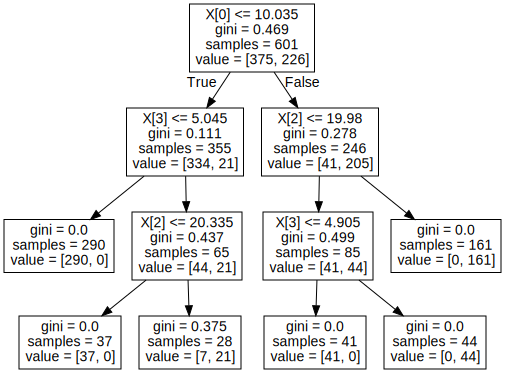

In [36]:
import graphviz 

dot_data = tree.export_graphviz(clf_gini)

# dot_data = tree.export_graphviz(clf_gini, out_file=None, 
#                               feature_names=X_train.columns,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

## **––––––––––––––––––––––––––––––––**

# 8. Decision Tree Classifier - entropy

In [37]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

**◎ Predict the Test set results with criterion entropy**

In [38]:
y_pred_en = clf_en.predict(X_test)

**◎ Check accuracy score with criterion entropy**

In [39]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9798


**◎ Compare the train-set and test-set accuracy**<br>
**◎ Now, I will compare the train-set and test-set accuracy to check for overfitting**.

In [40]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([-1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
        1, -1,  1,  1, -1

In [41]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9884


**◎ Check for overfitting and underfitting**

In [42]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9884
Test set score: 0.9798


# 9. Visualize decision-trees

[Text(0.5, 0.875, 'X[0] <= 10.035\nentropy = 0.955\nsamples = 601\nvalue = [375, 226]'),
 Text(0.2, 0.625, 'X[3] <= 5.045\nentropy = 0.324\nsamples = 355\nvalue = [334, 21]'),
 Text(0.1, 0.375, 'entropy = 0.0\nsamples = 290\nvalue = [290, 0]'),
 Text(0.3, 0.375, 'X[2] <= 20.335\nentropy = 0.908\nsamples = 65\nvalue = [44, 21]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.4, 0.125, 'entropy = 0.811\nsamples = 28\nvalue = [7, 21]'),
 Text(0.8, 0.625, 'X[2] <= 19.98\nentropy = 0.65\nsamples = 246\nvalue = [41, 205]'),
 Text(0.7, 0.375, 'X[3] <= 4.905\nentropy = 0.999\nsamples = 85\nvalue = [41, 44]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 44\nvalue = [0, 44]'),
 Text(0.9, 0.375, 'entropy = 0.0\nsamples = 161\nvalue = [0, 161]')]

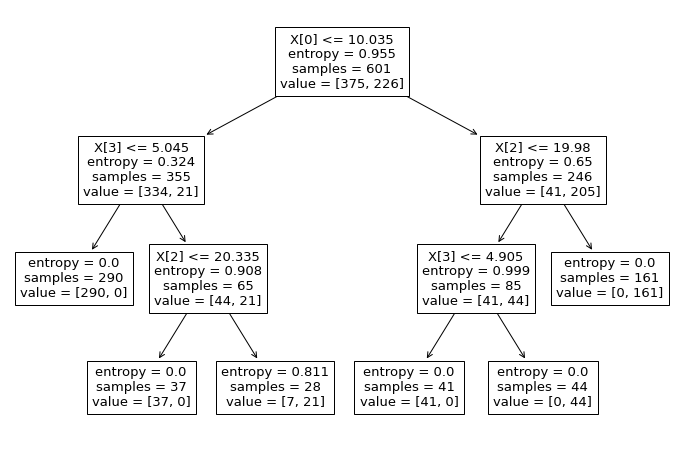

In [43]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

# 10. Visualize decision-trees with graphviz

In [44]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

KeyError: 0

# 11. Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form. 

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

# 12. Classification Report

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))